## Візуалізація accessibility елементів 

Також додаємо приклади як можна візуалізувати елементи з дерева доступності.

In [1]:
SCREEN_PATH = "data/screenshot.png"
TREE_PATH = "data/accessibility_tree.json"

In [2]:
from PIL import Image, ImageDraw
import json

def draw_elements(node, image):
    """

    :param node: JSON of GUI
    :param image_screenshot: PIL image of GUI
    :return: PIL image
    """
    if node['visible_bbox'] is not None:
        x, y, w, h = node['visible_bbox']
        image.rectangle([(x, y), (x + w, y + h)], outline="red", width=2)

    # Recursively parse all children    
    if node['children']:
        for child in node['children']:
            draw_elements(child, image)
    
    return image

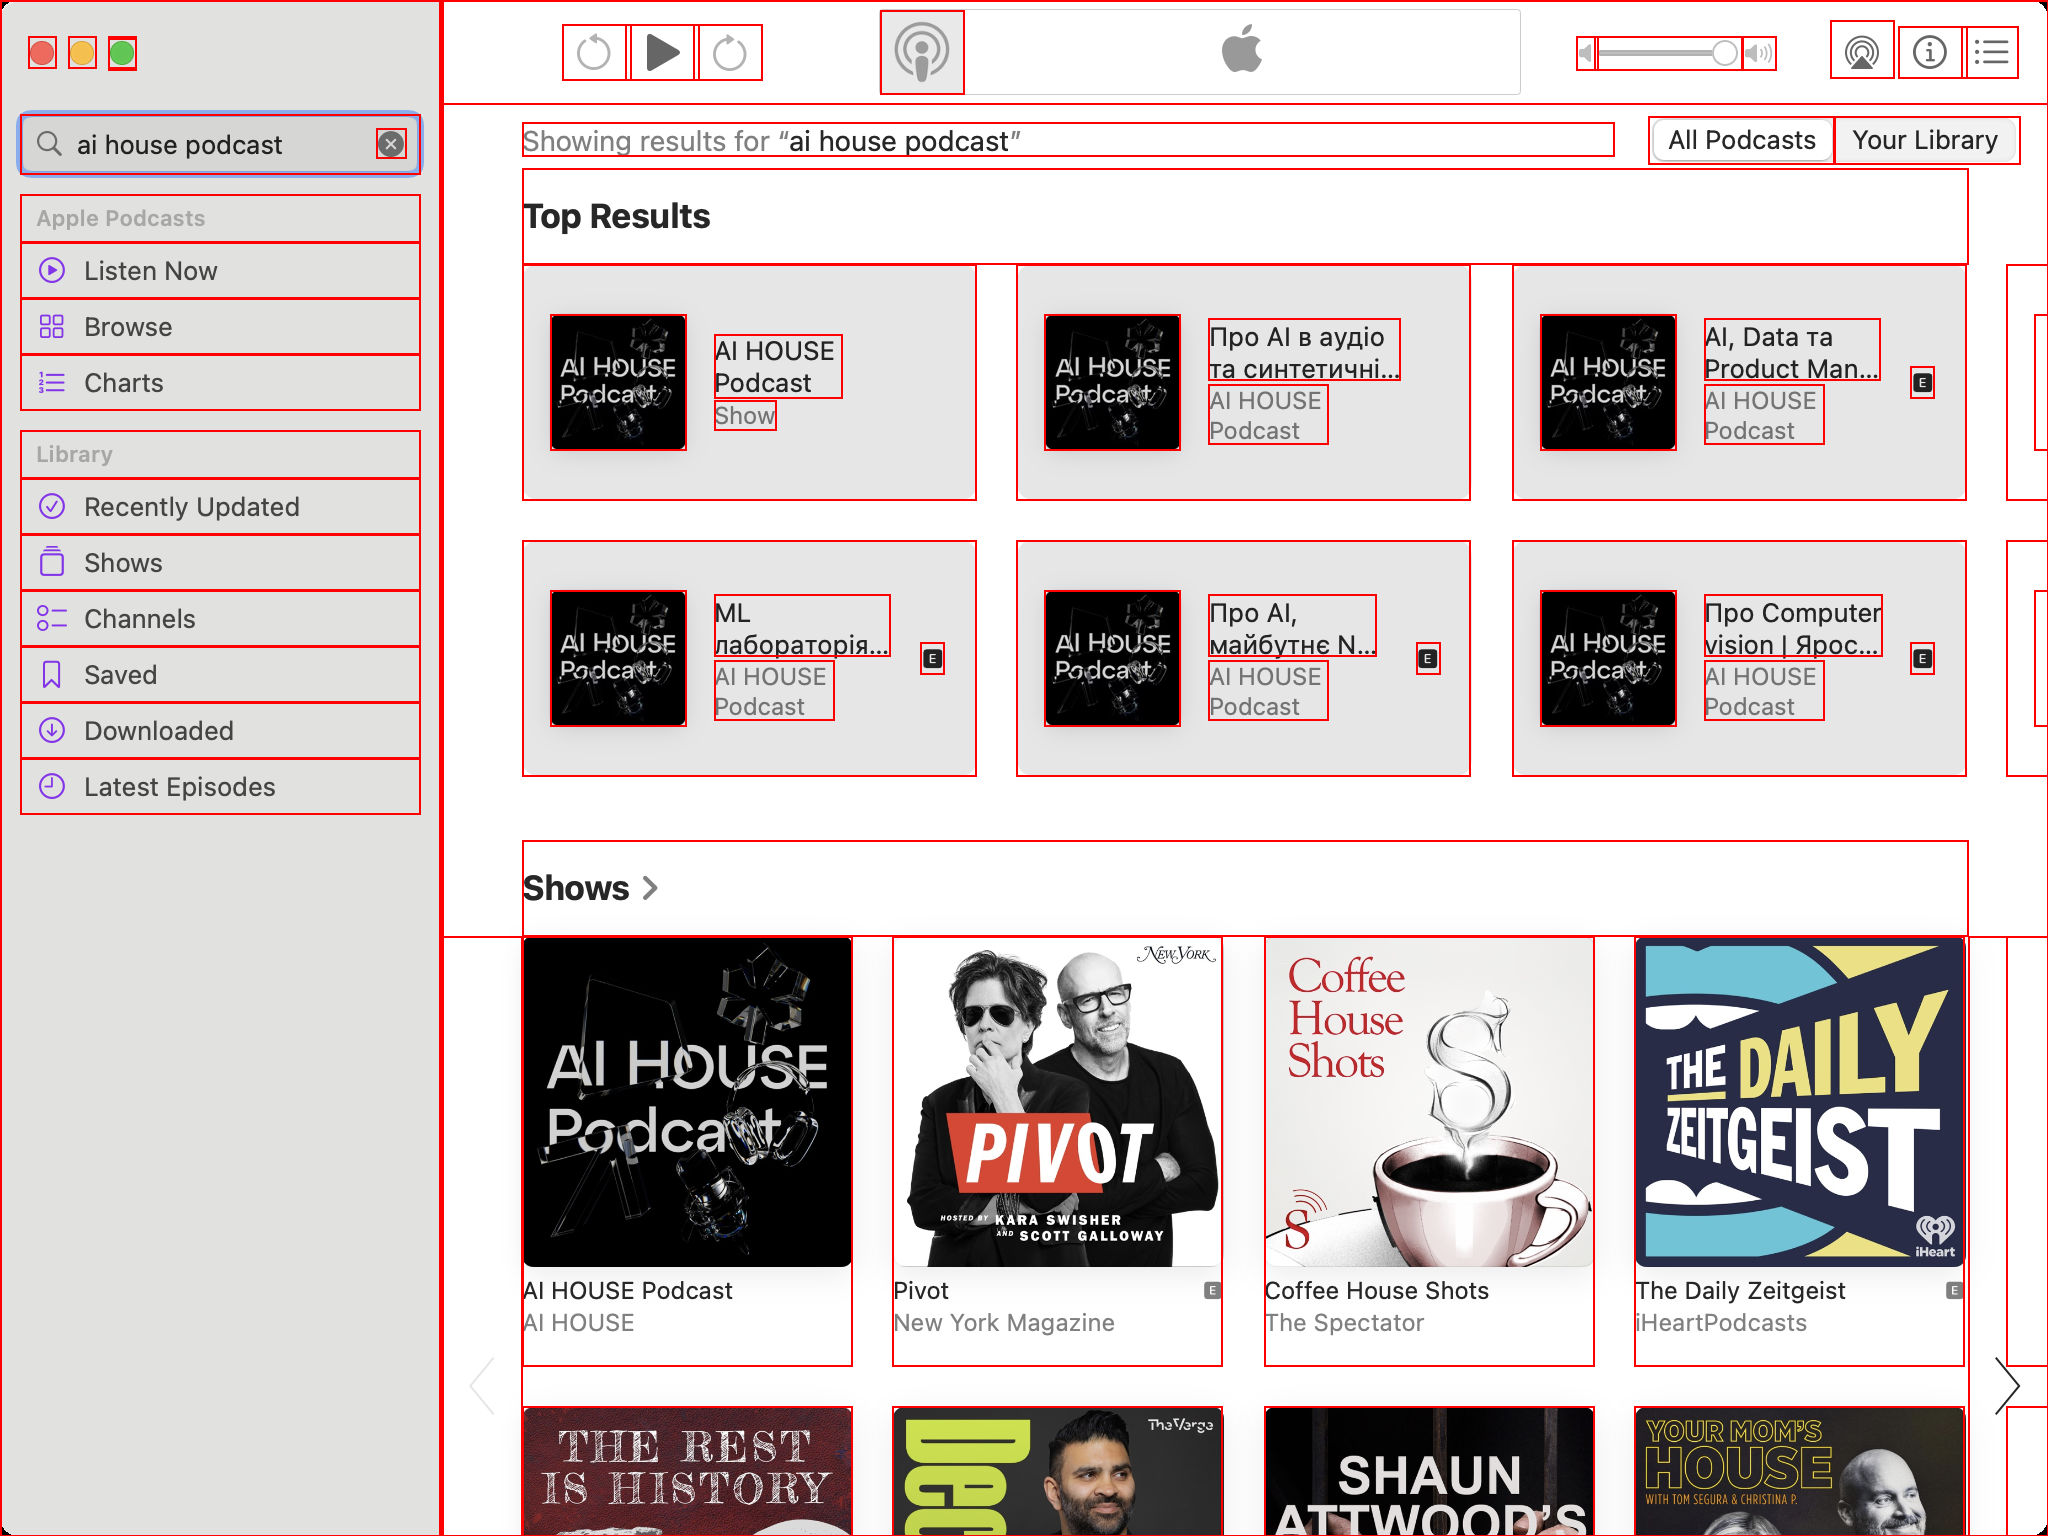

In [4]:
# Load GUI tree
with open(TREE_PATH, 'r') as json_file:
    gui_tree = json.load(json_file)

# Load image
image = Image.open(SCREEN_PATH).convert("RGB")
img_draw = ImageDraw.Draw(image)

# Draw all elements
img_draw = draw_elements(gui_tree, img_draw)

image